In [ ]:
# Install Pytrends
!pip install pytrends

# Import Pytrends
from pytrends.request import TrendReq

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Fetch daily trending searches
daily_trends = pytrends.trending_searches(pn='india')

# Display the top 5 trending topics
print("Top 5 Trending Topics Today:")
print(daily_trends.head())


Top 5 Trending Topics Today:
                   0
0     New Year's Eve
1       Adani Wilmar
2      New Year 2025
3  Manchester United
4            Chelsea


Top 5 Trending Topics Today:
                               0
0                   Adani Wilmar
1              Manchester United
2                        Chelsea
3  Unimech Aerospace share price
4       New Year wishes for love
Trending topics saved to 'trending_topics.csv'.


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


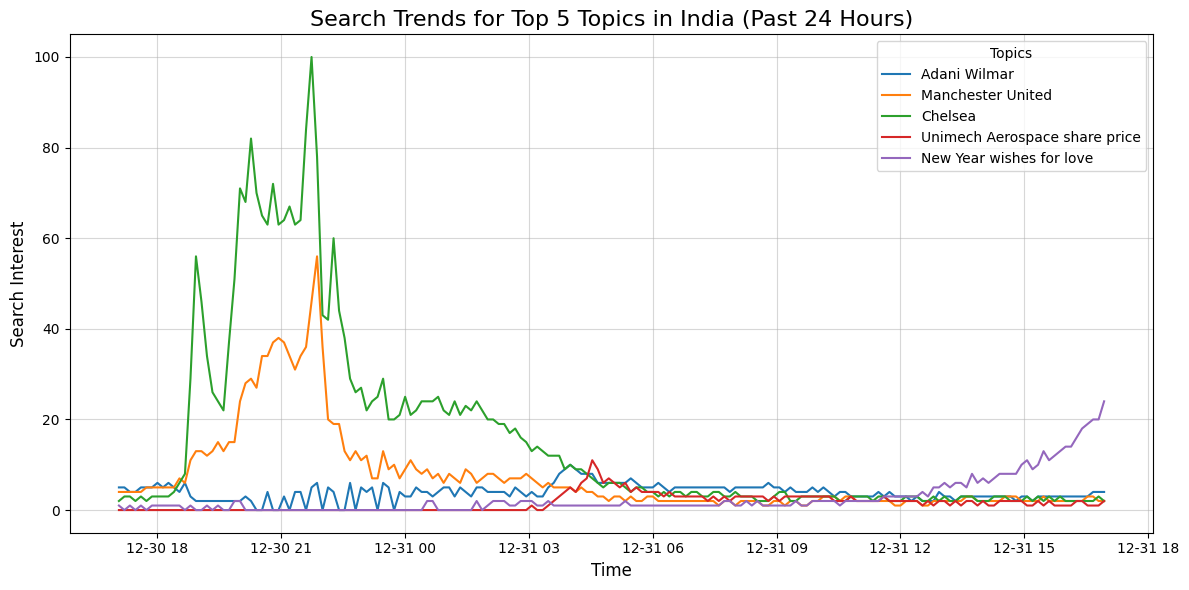

In [ ]:
# Install Pytrends
!pip install pytrends

# Import required libraries
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Fetch daily trending searches in India
daily_trends = pytrends.trending_searches(pn='india')

# Display the top 5 trending topics
print("Top 5 Trending Topics Today:")
top_trends = daily_trends.head(5)
print(top_trends)

# Extract top 5 trending topics as a list
trending_topics = top_trends[0].tolist()

# Save the top 5 trending topics to a CSV file
top_trends[0].to_csv('trending_topics.csv', index=False, header=['Trending Topics'])
print("Trending topics saved to 'trending_topics.csv'.")

# Fetch interest over time for these topics
pytrends.build_payload(kw_list=trending_topics, geo='IN', timeframe='now 1-d')
interest_over_time = pytrends.interest_over_time()

# Plot the trends
plt.figure(figsize=(12, 6))
for topic in trending_topics:
    plt.plot(interest_over_time.index, interest_over_time[topic], label=topic)

# Customize the plot
plt.title("Search Trends for Top 5 Topics in India (Past 24 Hours)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Search Interest", fontsize=12)
plt.legend(title="Topics", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("trending_topics.csv")
print(df.head())

                 Trending Topics
0                   Adani Wilmar
1              Manchester United
2                        Chelsea
3  Unimech Aerospace share price
4       New Year wishes for love


In [ ]:
import tweepy
import pandas as pd
import time
import os

# Twitter API Bearer Token (replace with your own)
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAEtjxwEAAAAAr3miA9YXdPBVcV4l1tM%2F8IKy5Dc%3DKViZQTOmhnGFFqCSPiRC7duveHEuyPuAuBWopJuxcJD9rf4OT8'

# Authenticate with Twitter API v2 using Bearer Token
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Load trending topics from the CSV file (make sure you have 5 topics)
trending_topics = pd.read_csv('trending_topics.csv')['Trending Topics'].tolist()

# Ensure there are only 5 trends to avoid exceeding rate limit
if len(trending_topics) != 5:
    raise ValueError("Please ensure that there are exactly 5 trending topics in the CSV file.")

# Create an output directory to save the CSV files
os.makedirs('tweets_data', exist_ok=True)

# Fetch tweets for each trending topic
for topic in trending_topics:
    print(f"Fetching tweets for topic: {topic}")

    # Create an empty DataFrame to store tweets for this specific topic
    tweets_data = pd.DataFrame(columns=['Topic', 'Tweet'])

    try:
        # Fetch recent tweets using the search_recent_tweets endpoint
        tweets = client.search_recent_tweets(query=topic, tweet_fields=['text'], max_results=100)  # Fetch 100 tweets per request

        if tweets.data:
            # Create a list to hold the new rows
            new_rows = []
            for tweet in tweets.data:
                new_rows.append({'Topic': topic, 'Tweet': tweet.text})
            # Use pd.concat to add the new rows to the DataFrame
            tweets_data = pd.concat([tweets_data, pd.DataFrame(new_rows)], ignore_index=True)

        # Save the tweets for this topic to a separate CSV file
        filename = f"tweets_data/{topic.replace(' ', '_')}_tweets.csv"
        tweets_data.to_csv(filename, index=False)

        print(f"Tweets for '{topic}' saved to '{filename}'.")

    except tweepy.TooManyRequests as e:
        # If rate limit is exceeded, sleep for 15 minutes
        print(f"Rate limit exceeded for topic: {topic}. Sleeping for 15 minutes...")
        time.sleep(900)  # Sleep for 15 minutes before retrying


Fetching tweets for topic: Adani Wilmar
Tweets for 'Adani Wilmar' saved to 'tweets_data/Adani_Wilmar_tweets.csv'.
Fetching tweets for topic: Manchester United
Rate limit exceeded for topic: Manchester United. Sleeping for 15 minutes...


KeyboardInterrupt: 

In [ ]:
!ls

sample_data  trending_topics.csv  tweets_data


In [ ]:
df = pd.read_csv("tweets_data/Adani_Wilmar_tweets.csv")
print(df.head())

          Topic                                              Tweet
0  Adani Wilmar  RT @jawharsircar: Adani empire starts cracking...
1  Adani Wilmar  RT @jawharsircar: Adani empire starts cracking...
2  Adani Wilmar  RT @RavinderKapur2: BREAKING NEWS ➖ Adani exit...
3  Adani Wilmar  RT @PriaINC: Breaking ‼️\n\nAdani Group to sel...
4  Adani Wilmar  RT @jawharsircar: Adani empire starts cracking...


In [ ]:
from google.colab import files

# Provide the correct path to the file you want to download
file_path = 'tweets_data/Adani_Wilmar_tweets.csv'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>